## Analysis of things

### Data loader- H2Li zero d Flame

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd

import os,sys
# sys.addaudithook
rpath = os.getcwd()
sys.path.insert(0,"../")
# import utils

import dimred ### library of dimension reduction
from dimred.newpipe import Elbow
from dimred.newcistern import Knob

from dimred.data.loader import LoadMPI,LoadNumpy,LoadOne
from dimred.data.preprocess import MinMaxScalar,AvgMaxScalar,MaxAvgScalar,scaleData
from dimred.models.linear.transform import co_kurtosis,ra_kurtosis,val_kurtosis

In [9]:
loader = LoadNumpy('zero','zerohydro')

In [11]:
loader.gasobj()


  gas:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.081894 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             27711             55865  J
   internal energy       -1.2096e+06       -2.4385e+06  J
           entropy             64868        1.3077e+05  J/K
    Gibbs function       -1.9433e+07       -3.9176e+07  J
 heat capacity c_p             14324             28877  J/K
 heat capacity c_v             10200             20563  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.706
     [   +8 minor]                 0                 0  



In [12]:
plt.style.use('seaborn')


### Sampling analysis - H2-Li zero-d flame

In [13]:
class Crossings(Elbow):
    def __init__(self, data_name="premixz") -> None:
        super().__init__(data_name=data_name)
        self.IMAX = 25

    def mf_data(self,time_step=9,plot=False):
        return self.loader.x[0,::time_step+1].copy()

Time required for co_variance is 2.217293e-05 sec


  0%|          | 0/455 [00:00<?, ?it/s]

Time required for val_kurtosis is 3.038216e-02 sec


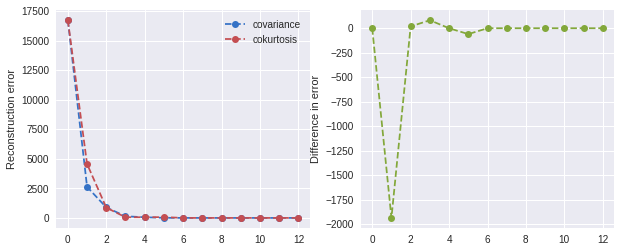

In [27]:
rn = Crossings('zerohydro')
rn.MyScalar = MinMaxScalar

rn.mf_build(9);
# rn.mf_alldata();
midbar = Knob(rn)


In [28]:
midbar

### Sampling analysis -- premixed flame

In [16]:
premix = LoadNumpy('prem','premixz')

For species CH2CHO, discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  26.065097100000003
	Value computed using high-temperature polynomial: 11.747907039000001

For species CH2CHO, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  13.293446295
	Value computed using high-temperature polynomial: 9.714151448299999

For species CH2CHO, discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  47.90778318164618
	Value computed using high-temperature polynomial: 43.13539330776299



Average Error is 7.958e+00


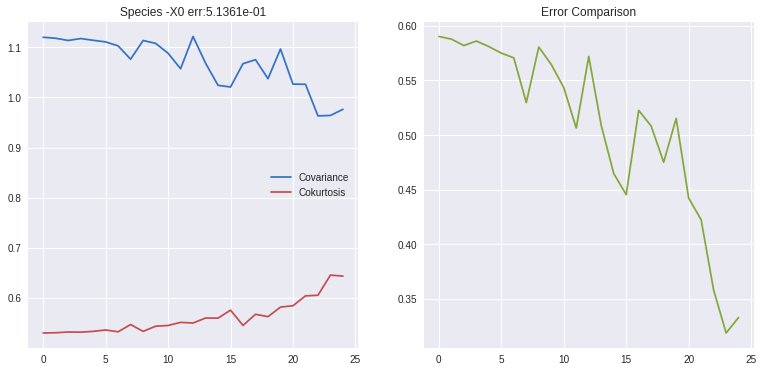

In [ ]:
rn = Crossings()
rn.MyScalar = MinMaxScalar

rn.mf_build(9);
# rn.mf_alldata();
topbar = Knob(rn)


In [25]:
topbar